# Gene expression & surface protein TIL 

## Load adata annotated 

In [1]:
# Libraries
import anndata as ad
import matplotlib as plt
import numpy as np
import pandas as pd
import sc_atlas_helpers as ah
import scanpy as sc
from matplotlib.pyplot import rc_context
from scipy.stats import median_abs_deviation

In [2]:
from functools import partial

import altair as alt

In [3]:
import seaborn as sns

In [4]:
import decoupler as dc

In [ ]:
resDir = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/40_gex_surface_prot/"
inputDir = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/40_gex_surface_prot/"

In [ ]:
adata = sc.read_h5ad(f"{resDir}adata_merged_til_annotated_new.h5ad")

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000023078"]

In [ ]:
adata

In [ ]:
adata

In [ ]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))


In [ ]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo"], inplace=True, percent_top=[20], log1p=True
)
adata

In [ ]:
sc.pl.violin(adata, "pct_counts_mt")

In [ ]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [ ]:
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
)
adata.obs.outlier.value_counts()

In [ ]:
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 1.5
)
adata.obs.mt_outlier.value_counts()

In [ ]:
print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

In [ ]:
sc.pl.violin(adata, "pct_counts_mt")

In [ ]:
# Visualize
sc.pl.umap(adata, color='joint_leiden')

In [ ]:
#sc.pl.umap(adata, color = ["Cd69","Il2ra"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.violin(adata, keys = ["Cd69","Il2ra"], groupby="joint_leiden")

In [ ]:
#markers =["Cd69","Il2ra"]
#sc.pl.dotplot(adata,markers , groupby='joint_leiden', dendrogram=False,log=True, cmap="seismic" )

In [ ]:
#sc.pl.umap(adata, color = ["Sell","Cd44"], cmap="Reds", vmax="p99")

In [ ]:
#markers =["Sell","Cd44"]
#sc.pl.dotplot(adata,markers , groupby='joint_leiden', dendrogram=False,log=True, cmap="seismic" )

In [ ]:
#sc.pl.violin(adata, keys = ["Sell","Cd44"], groupby="joint_leiden")

In [ ]:
#sc.pl.umap(adata, color = ["Gzmk","Il7r"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.umap(adata, color = ["Sell","Cd69","Il2ra"], cmap="Reds", vmax="p99")

In [ ]:
adata.obs.sample_id.value_counts()

In [ ]:
adata

In [ ]:
adata_til1 = adata[adata.obs["joint_leiden"].isin(["2","5"])]

In [ ]:
adata_til2 = adata[adata.obs["joint_leiden"].isin(["0","1","3","4","6"])]

In [ ]:
adata_til2.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))

In [ ]:
adata_til1.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))

In [ ]:
adata_til1 = adata_til1[:, adata_til1.var['ribo'] == False].copy()

In [ ]:
adata_til2 = adata_til2[:, adata_til2.var['ribo'] == False].copy()

In [ ]:
sc.pp.neighbors(adata_til1, n_neighbors=10)
sc.tl.leiden(adata_til1, resolution=0.32, n_iterations=-1)
sc.tl.umap(adata_til1)

In [ ]:
sc.pl.umap(adata_til1, color = "leiden")

In [ ]:
annotation_dict = {
    '2':'MPEC_Progenitor',
    '0':'MPEC_Intermediate',
    '1':'MPEC_Effector',}

In [ ]:
#sc.pl.umap(adata_til1, color = ["Sell","Cd44"], cmap="Reds", vmax="p99")

In [ ]:
#markers =["Sell","Cd44"]
#sc.pl.dotplot(adata_til1,markers , groupby='leiden', dendrogram=False,log=True, cmap="seismic" )

In [ ]:
#sc.pl.violin(adata_til1, keys = ["Sell","Cd44"], groupby="cell_type", rotation=45)

In [ ]:
#sc.pl.violin(adata_til1, keys = ["Itga4"], groupby="cell_type", rotation=45)

In [ ]:
#sc.pl.umap(adata_til1, color = ["Itga4"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.umap(adata, color = ["Itga4","joint_leiden"], cmap="Reds", vmax="p99")

In [ ]:
#markers =["Itga4"]
#sc.pl.dotplot(adata,markers , groupby='joint_leiden', swap_axes =False,log=True, cmap="seismic" )

## Tumor reactive like CD8 T cell markers
# Cxcl13 & Layn  --> Recovered genes but they are so low expressed that is why they were filtered
https://ars.els-cdn.com/content/image/1-s2.0-S1535610824002344-gr4_lrg.jpg

In [ ]:
#sc.pl.umap(adata_til1, color = ["Cxcr5","Gzmk","Il7r"], cmap="Reds", vmax="p99")

In [ ]:
#markers =["Cxcr5","Gzmk","Il7r"]
#sc.pl.dotplot(adata_til1,markers , groupby='joint_leiden', swap_axes =False,log=True, cmap="seismic" )

## Cycling marker

In [ ]:
#sc.pl.umap(adata_til1, color = ["Mki67"], cmap="Reds", vmax="p99")

## T differentiation 

In [ ]:
#sc.pl.umap(adata_til1, color = ["Sell","Cd44"], cmap="Reds", vmax="p99")

## Surface antibodies

In [ ]:
#sc.pl.umap(adata_til1, color = ["PD1_TotalSeqC","CD69_TotalSeqC","CD44_TotalSeqC","ICOS_TotalSeqC","CD103_TotalSeqC"], cmap="Reds", vmax="p99")

## T effector into SLEC and MPEC

In [ ]:
#sc.pl.umap(adata_til1, color = ["Klrg1","Il7r","Tbx21"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.violin(adata_til1, keys =["Klrg1","Il7r","Tbx21"], groupby="cell_type", rotation=45)

In [ ]:
#markers =["Klrg1","Il7r","Tbx21"]
#sc.pl.dotplot(adata_til1,markers , groupby='cell_type', swap_axes =False,log=True, cmap="seismic" )

## Markers from publication SLECs & MPECs 
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2034442/

- MPECs KLRG1 low, Il7r high, CD122 high, SELF RENEWAL
- SLECs KLRG1 high, Il7r low, Cd122 high NOT SELF RENEWAl

- Naive CD8 T cells are IL-7Rhi, CD122lo (IL-2/15βR), KLRG1neg and T-betneg and are IL-7 dependent. Early during infection, most effector CD8 T cells become CD122hi and downregulate IL-7R to an intermediate-to-low level, but expression of T-bet and KLRG1 is set depending on their exposure to inflammatory cytokines (e.g. IL-12). Effector CD8 T cells that are exposed to lower levels of inflammation express less T-bet (light blue cells) and begin to upregulate IL-7R to become KLRG1lo IL-7Rhi MPECs (turquoise cells). Effector CD8 T cells that encounter higher levels of inflammatory cytokines express relatively more T-bet and KLRG1 (dark blue cells), stably repress IL-7R and consequentially become KLRG1hi IL-7Rlo SLECs. SLECs become IL-15 dependent, however, IL-15 alone cannot support their long-term persistence or homeostatic turnover and they decline over time. In contrast, MPECs remain dually responsive to IL-7 and IL-15 and preferentially develop into long-lived memory CD8 T cells that can self-renew.

In [ ]:
#sc.pl.umap(adata_til1, color = ["Klrg1","Il7r","Il2rb","Itga4","Itgae","Cxcr3","Casp3"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.umap(adata_til1, color = ["Cxcr3","Casp3"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.violin(adata_til1, keys = ["Cxcr3","Casp3"], groupby="cell_type", rotation=45)

In [ ]:
#markers =["Cxcr3","Casp3","Gzmb","Gzmk","Gzma","Ifng","Tox","Lag3"]
#sc.pl.dotplot(adata_til1,markers , groupby='cell_type', swap_axes =False,log=True, cmap="seismic" )

In [ ]:
#sc.pl.umap(adata_til1, color = ["Cxcr5"], cmap="Reds", vmax="p99")

## CYTOTOXIC 

In [ ]:
#sc.pl.umap(adata_til1, color = ["Gzmb","Gzmk","Gzma","Ifng"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.violin(adata_til1, keys =["Gzmb","Gzmk","Gzma","Ifng"], groupby="cell_type", rotation=45)

## T act EARLY vs LATE 
CD25 --> Il2ra

In [ ]:
#sc.pl.umap(adata_til1, color = ["Cd69","Il2ra"], cmap="Reds", vmax="p99")

## Top genes from rank genes 

In [ ]:
adata_til1.obs.leiden

In [ ]:
#sc.tl.rank_genes_groups(adata_til1, "leiden", method="t-test")
#sc.pl.rank_genes_groups(adata_til1, n_genes=25, sharey=False)

In [ ]:
#pd.DataFrame(adata_til1.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
#sc.pl.umap(adata_til1, color = ["ICOS_TotalSeqC","CD103_TotalSeqC","Lef1","Ccr7","Ly6c2","CD44_TotalSeqC","Eef1b2","Sell","Ccl5","S100a6","Nkg7","Itgb1"], cmap="Reds", vmax="p99")

## Cluster mpec1 naive 

In [ ]:
#sc.pl.umap(adata_til1, color = ["ICOS_TotalSeqC","CD103_TotalSeqC","Lef1","Ccr7","Satb1","Klf2"], cmap="Reds", vmax="p99")

## Cluster mpec memory  

In [ ]:
#sc.pl.umap(adata_til1, color = ["Ly6c2","CD44_TotalSeqC","Bcl2","Eef1b2","Nme2","Sell"], cmap="Reds", vmax="p99")

## Cluster 2 effector

In [ ]:

#sc.pl.umap(adata_til1, color = ["Ccl5","Nkg7","S100a6","Lgals1","H2-D1"], cmap="Reds", vmax="p99")

## Exhaustion markers

In [ ]:
#sc.pl.umap(adata_til1, color = ["Tox","Lag3"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.violin(adata_til1, keys =["Tox","Lag3"], groupby="cell_type", rotation=45)

In [ ]:
#sc.pl.umap(adata_til1, color = ["CD103_TotalSeqC","Bcl2","Cxcr3"], cmap="Reds", vmax="p99")

In [ ]:
## Add cell type column based on annotation
adata_til1.obs['cell_type'] = [annotation_dict[clust] for clust in adata_til1.obs['leiden']]

# Visualize
sc.pl.umap(adata_til1, color='cell_type')

# Adata til2

In [ ]:
sc.pp.neighbors(adata_til2, n_neighbors=10)
sc.tl.leiden(adata_til2, resolution=0.5,  n_iterations=-1)
sc.tl.umap(adata_til2)

In [ ]:
sc.pl.umap(adata_til2, color = "leiden")

In [ ]:
#sc.pl.umap(adata_til2, color = ["PD1_TotalSeqC","CD69_TotalSeqC","CD44_TotalSeqC","ICOS_TotalSeqC","CD103_TotalSeqC"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.umap(adata_til2, color = ["PD1_TotalSeqC","Lag3","Tox","Havcr2","Entpd1"], cmap="Reds", vmax="p99")

In [ ]:
#sc.pl.umap(adata_til2, color = ["CD69_TotalSeqC","CD103_TotalSeqC","Itgae","Sell","CD44_TotalSeqC","Cd44"], cmap="Reds", vmax="p99")

## CYTOTOXIC 

In [ ]:
#sc.pl.umap(adata_til2, color = ["Gzmb","Gzmk","Gzma","Ifng"], cmap="Reds", vmax="p99")

## JUST A CHECK

### Early vs late 

In [ ]:
#sc.pl.umap(adata_til2, color = ["Cd69","Il2ra"], cmap="Reds", vmax="p99")

### Differentiation

In [ ]:
#sc.pl.umap(adata_til2, color = ["Sell","Cd44"], cmap="Reds", vmax="p99")

### Effector states

In [ ]:
#sc.pl.umap(adata_til2, color = ["Klrg1","Il7r"], cmap="Reds", vmax="p99")

In [ ]:
#sc.tl.rank_genes_groups(adata_til2, "leiden", method="t-test")
#sc.pl.rank_genes_groups(adata_til2, n_genes=25, sharey=False)

In [ ]:
#pd.DataFrame(adata_til2.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
#sc.tl.rank_genes_groups(adata_til2, 'leiden')

In [ ]:
#sc.pl.rank_genes_groups_dotplot(
#    adata_til2,
#    n_genes=4,
#    values_to_plot="logfoldchanges", cmap='Reds',
#    vmin=-4,
#    vmax=4,
#    min_logfoldchange=3,
#    colorbar_title='log fold change'
#)

In [ ]:
sc.pl.umap(adata_til2, color = "leiden")

In [ ]:
#markers =["Lag3","Tox","Ifit1","Ifitm1","Ifit3","Ccl5","Ccr7","Sell","Foxp1","Dock2","Dock10","Zc3h7a","S100a6","Gzmb","Il31ra","Lef1"]
#sc.pl.dotplot(adata_til2, markers, groupby='rna_leiden', dendrogram=True,log=True, cmap="Reds" )

In [ ]:
#annotation_dict = {
#   '0':'SLEC_Ccr7',
#   '1':'SLEC_unknown',
#   '2':'SLEC_Ifit3',
#   '3':'SLEC_Dock2',
#   '4':'SLEC_Ccr7',
#   '5':'SLEC_unknown',
#   '6':'SLEC_Ccr7',
#   '7':'SLEC_Ifitm1',
#   '8':'SLEC_Trbv13-2',
#   '9':'SLEC_Trbv16',
#   '10':'SLEC_unknown',
#   '11':'SLEC_Hmgb2',
#   '12':'SLEC_Zc3h7a',
#   '13':'SLEC_Dock2',
#   '14':'SLEC_Zc3h7a'}

In [ ]:
## Add cell type column based on annotation
#adata_til2.obs['cell_type'] = [annotation_dict[clust] for clust in adata_til2.obs['rna_leiden']]

# Visualize
#sc.pl.umap(adata_til2, color='cell_type')

In [ ]:
#sc.pl.umap(adata_til2, color='leiden')

In [ ]:
#sc.pl.umap(adata_til2, color='rna_leiden')

In [ ]:
#sc.tl.rank_genes_groups(adata_til2, 'rna_leiden')

In [ ]:
#pd.DataFrame(adata_til2.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
#sc.pl.rank_genes_groups_dotplot(
#    adata_til2,
#    n_genes=4,
#    values_to_plot="logfoldchanges", cmap='Reds',
#    vmin=-4,
#    vmax=4,
#    min_logfoldchange=3,
#    colorbar_title='log fold change'
#)

In [ ]:
#sc.pl.umap(adata_til2, color = ["Ifit3","Ifit1","Ifitm1","Sell","Tnfrsf9","Ccr7","Trbv13-2","Trbv16","Stmn1","Hmgb2","Zc3h7a","Tox","Dock2","Itga4","Cxcr3","Itgae","Il2rb"], cmap="Reds", vmax="p99", legend_loc="on data")

In [ ]:
#sc.pl.umap(adata_til2, color = "rna_leiden",vmax="p99", cmap="Reds")

## Markers of exhausted CD8+ T cell subsets 

- https://pubmed.ncbi.nlm.nih.gov/36907685/#&gid=article-figures&pid=figure-1-uid-0

Tex_pro : Ly1008+, Cxcr5+ Il7r+, Cd62l+, Ccr7+ ,Ifng low, Tnf alpha low, Tcf1+, Tox high, Eomes int  

- Ly108 - Slamf6
- Tcf1  - Tcf7
- Cd62 - Sell 

Tex_int: Cxcr1+, Cxcr6 high, Tim3+, PD1int, Gzmb int, Ifng int, Tnfa int, Tox int, Eomes int, Tbet int, NR4aw int

- "Cxcr1" - Il8ra no present
- Tim3 - Havcr2

Tex eff Cxcr1+, Klrg1+, Cxcr6+, Tim3+, Pd1int, Gzmb high, Ifng high, Tnf a high, Tbet high, Zeb2+, 

Tex term Tim3+, Pd1 high, Lag3 high, Cxcr6 high, Cd101+, Gzmbint, Gzmk+, Ifng low, Tnfa low, Tox high, Eomes high, Nr4a2+ 

## Tex_prog

In [ ]:
#Tex_prog = ["Slamf6","Cxcr5","Il7r","Sell","Ccr7","Ifng","Tnf","Tcf7","Tox","Eomes"]

In [ ]:
#sc.pl.umap(adata_til2, color = Tex_prog, cmap="Reds", vmax="p99")

## Tex_int

In [ ]:
#Tex_int = ["Cxcr6","Havcr2","Pdcd1","Gzmb","Ifng","Tnf","Tox","Eomes","Nr4a2"]

In [ ]:
#sc.pl.umap(adata_til2, color = Tex_int, cmap="Reds", vmax="p99")

## Tex_eff

In [ ]:
#Tex_eff = ["Klrg1","Cxcr6","Havcr2","Pdcd1","Gzmb","Ifng","Tnf","Zeb2"]

In [ ]:
#sc.pl.umap(adata_til2, color = Tex_eff, cmap="Reds", vmax="p99")

## Tex_term

In [ ]:
#Tex_term = ["Havcr2","Pdcd1","Lag3","Cxcr6","Cd101","Gzmb","Gzmk","Ifng","Tnf","Tox","Eomes", "Nr4a2"]

In [ ]:
#sc.pl.umap(adata_til2, color = Tex_term, cmap="Reds", vmax="p99")

## All markers for of exhausted CD8+ T cell subsets

In [ ]:
#markers = Tex_prog + Tex_eff + Tex_int + Tex_term

In [ ]:
#markers_unique = list(set(markers))

In [ ]:
#markers_unique.append("Klrg1")

## SLEC 

In [ ]:
#sc.pl.dotplot(adata_til2, markers_unique, groupby='leiden', dendrogram=True)

In [ ]:
#sc.pl.umap(adata_til1, color='cell_type')

In [ ]:
#sc.pl.umap(adata_til2, color = ["leiden","rna_leiden"])

In [ ]:
#sc.pl.umap(adata_til2, color = ["rna_leiden"], groups=["3","4","6","12"])

In [ ]:
#Texprog = ["Slamf6","Sell","Ccr7","Tcf7"]
#Texint = ["Havcr2","Entpd1","Gzmb","Tox","Ifng","Tnf","Tox","Eomes","Tbx21","Nr4a2"]
#Texeff = ["Klrg1","Cxcr6","Havcr2","Entpd1","Gzmb","Ifng","Zeb2"]
#Texeterm = ["Havcr2","Entpd1","Lag3","Cxcr6","Cd101","Gzmb","Gzmk","Ifng","Tnf","Tox","Eomes","Nr4a2"]

In [ ]:
#sc.pl.umap(adata_til2, color = Texprog, cmap="Reds", vmax="p99", vmin=0)

In [ ]:
#sc.pl.umap(adata_til2, color = Texint, cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
#sc.pl.umap(adata_til2, color = Texeff, cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
#sc.pl.umap(adata_til2, color = Texeterm, cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
#sc.pl.umap(adata_til2, color = ["Sell","Ccr7","Cxcr3","Trbv16","Trbv13-2","Hmgb2","Gzmb","Ifit3","Ifit1","Ifitm1","Zc3h7a","Tox"], cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
annotation_dict = {
    '0':'Tex_eff',
    '1':'Tex_eff',
    '2':'Interferon_response',
    '3':'Tex_term',
    '4':'Plastic',
    '5':'Tex_term',
    '6':'Tex_prog',
    '7':'Interferon_response',
    '8':'Tex_int',
    '9':'Tex_int',
    '10':'Tex_term',
    '11':'Tex_term',
    '12':'Tex_term',
    '13':'Tex_term',
    '14':'Tex_term'}

In [ ]:
sc.pl.umap(adata_til2, color='rna_leiden')

In [ ]:
## Add cell type column based on annotation
adata_til2.obs['cell_type'] = [annotation_dict[clust] for clust in adata_til2.obs['rna_leiden']]

# Visualize
sc.pl.umap(adata_til2, color='cell_type')

In [ ]:
#sc.pl.umap(adata_til2, color='rna_leiden')

In [ ]:
#adata.write_h5ad(f"{resDir}/adata_merged_til_annotated.h5ad")

## Checking subsets from publication 
https://www.sciencedirect.com/science/article/pii/S1535610824002344?ref=pdf_download&fr=RR-2&rr=8a7ba8113b45c268


In [ ]:
#markers_tcell_subset = ["Ccr7","Sell","Anxa1","Gzmk","Xcl1","Hspa1b","Cx3cr1","Cd160"]

In [ ]:
#sc.pl.umap(adata, color = markers_tcell_subset, cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
#sc.pl.umap(adata_til1, color = markers_tcell_subset, cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
#sc.pl.umap(adata_til2, color = markers_tcell_subset, cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
## SLEC vs MPEC difference 

In [ ]:
#sc.pl.umap(adata, color = ["Klrg1","Il7r","Tbx21"], cmap="Reds",  vmax="p99", vmin=0)

In [ ]:
#adata

In [ ]:
#sc.pl.violin(adata, keys = ["Klrg1","Il7r","Tbx21"], groupby="joint_leiden")

In [ ]:
#markers =["Klrg1","Il7r","Tbx21"]
#sc.pl.dotplot(adata, markers, groupby='joint_leiden', dendrogram=False,log=True, cmap="seismic" )

In [ ]:
#sc.pl.matrixplot(adata, markers, groupby='joint_leiden', dendrogram=True,log=True)

In [ ]:
#sc.pl.umap(adata, color = "joint_leiden")

In [ ]:
adata.obs["cell_type"] = adata.obs["cell_type"].astype("str")
adata.obs.loc[adata_til2.obs.index, "cell_type"] = adata_til2.obs["cell_type"].astype("str")

In [ ]:
adata.obs["cell_type"] = adata.obs["cell_type"].astype("str")
adata.obs.loc[adata_til1.obs.index, "cell_type"] = adata_til1.obs["cell_type"].astype("str")

In [ ]:
sc.pl.umap(adata, color='cell_type')#, legend_loc="on data",legend_fontsize=5)

In [ ]:
adata.obs["cell_type2"] = adata.obs["cell_type"] 

In [ ]:
set(adata.obs["cell_type2"])

In [ ]:
set(adata.obs["cell_type"])

In [ ]:
adata.obs["cell_type2"].replace('Plastic', 'SLEC_Plastic', inplace=True)
adata.obs["cell_type2"].replace('Tex_prog', 'SLEC_Progenitor', inplace=True)
adata.obs["cell_type2"].replace('Tex_int', 'SLEC_Intermediate', inplace=True)
adata.obs["cell_type2"].replace('Interferon_response', 'SLEC_Inf', inplace=True)
adata.obs["cell_type2"].replace('Tex_eff', 'SLEC_Effector', inplace=True) 
adata.obs["cell_type2"].replace('Tex_term', 'SLEC_Terminal', inplace=True)
adata.obs["cell_type2"].replace('Zc3h7a', 'SLEC_Terminal', inplace=True)


In [ ]:
sc.pl.umap(adata, color=['cell_type2'], legend_loc ="on data",sort_order=True, legend_fontsize=6)

In [ ]:
["Lcn2","Cxcl2","Cxcl5","Tnf","Ccl20"]

In [ ]:
#markers =["Cxcr3","Cxcr5","Ccl5","Cxcl10"]
# no expression of "Cxcl2","Cxcr2", "Ccr6", 
markers = ["Tnf","Cxcr3","Cxcr5","Ccl5","Cxcl10"]
sc.pl.dotplot(adata,markers , groupby='cell_type', swap_axes =False,log=True, cmap="seismic" )

In [ ]:
sc.pl.umap(adata, color =  ["Cxcl2","Cxcr2"], cmap="Reds")

In [ ]:
sc.pl.umap(adata, color =  ["Cxcr3","Cxcl10"], cmap="Reds")

In [ ]:
sc.pl.umap(adata, color =  ["Tnf","Ccr6"], cmap="Reds")

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000026822"] #Lcn2

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000029380"] #cxcl1

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000029417"] #cxcl9 --> Cxcr3

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000058427"] #cxcl2

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000034855"] #cxcl10

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000029379"] #cxcl3

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000026166"] #ccl20

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000026166"] #ccl20 --> CCR6 

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000026822"] #Lcn2

In [ ]:
adata.var[adata.var["gene_ids"]=="ENSMUSG00000029371"] #Cxcl5

In [ ]:
adata

In [ ]:
adata_og = adata.copy()

In [ ]:
#adata.write_h5ad("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/adata_merged_til_slec_mpec_annotation_tryneighbors.h5ad", )

In [5]:
adata= sc.read_h5ad("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/adata_merged_til_slec_mpec_annotation_tryneighbors.h5ad")

## PAGA

In [ ]:
# Libraries
import anndata as ad
import matplotlib as plt
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
#import sc_atlas_helpers as ah
import scanpy as sc
from matplotlib.pyplot import rc_context
from scipy.stats import median_abs_deviation
from scipy.stats import mode
from collections import Counter

In [ ]:
sc.pp.neighbors(adata, n_neighbors=7, n_pcs=20)

In [ ]:
sc.tl.leiden(adata)

In [ ]:
sc.tl.louvain(adata)

In [ ]:
sc.pl.umap(adata, color=['leiden','louvain'], sort_order=True)

In [ ]:
adata

In [ ]:
#adata.write_h5ad("adata_neighbors.h5ad")

In [ ]:
adata = sc.read_h5ad("adata_neighbors.h5ad")

In [ ]:
sc.tl.paga(adata)

In [ ]:
#sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['leiden','louvain'], sort_order=True)

In [ ]:
sc.pl.umap(adata, color=['cell_type','cell_type2'], sort_order=True)

In [ ]:
sc.tl.diffmap(adata)

In [ ]:

sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_diffmap')

In [ ]:
#adata.obs['cell_type2'].cat.categories = [str(i) for i in range(len(adata.obs['cell_type2'].cat.categories))]

In [ ]:
adata.obs['clusters'] = adata.obs['cell_type']

In [ ]:
sc.tl.paga(adata, groups='clusters')

In [ ]:
sc.pl.paga(adata, threshold=0.02, edge_width_scale=1, layout='fr', random_state=0)

In [ ]:
pos = adata.uns['paga']['pos']

In [ ]:
sc.pl.paga(adata, threshold=0.02, edge_width_scale=1, layout='fr', pos=pos)

In [ ]:
#sc.tl.umap(adata, init_pos='paga')

In [ ]:
sc.pl.umap(adata, color='clusters', legend_loc='on data')

In [ ]:
axs = sc.pl.paga_compare(
    adata, title='', right_margin=0.2, size=10,
    threshold=0.02,
    legend_fontsize=8, fontsize=8, frameon=False, show=False)

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters'] == 'MPEC_Progenitor')[0]

In [ ]:
sc.tl.dpt(adata)

In [ ]:
sc.pl.umap(adata, color=['cell_type2','dpt_pseudotime'], vmax="p99", cmap = "viridis",legend_fontsize=8)

In [ ]:
## colon & til 

In [6]:
path = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/solo"

In [77]:
adata_solo = sc.read_h5ad(f"{path}/adata_nodoublet.h5ad")

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Map adata cell type column to adata_solo based on cell barcodes 

In [79]:
adata_solo.obs["sample_id"]  = adata_solo.obs["sample_id"].str.replace("-","_")

In [81]:
new_obs_names = adata_solo.obs_names.str.replace(r"-.+", "-1", regex=True)

# Step 2: Concatenate with "_" and adata_solo.obs["sample_id"]
new_obs_names += "_" + adata_solo.obs["sample_id"].astype(str)

# Assign the new values back to adata_solo.obs_names
adata_solo.obs_names = new_obs_names

In [83]:
cell_type_data = adata.obs["cell_type"]
adata_solo.obs["cell_type"] = adata_solo.obs.index.map(cell_type_data)

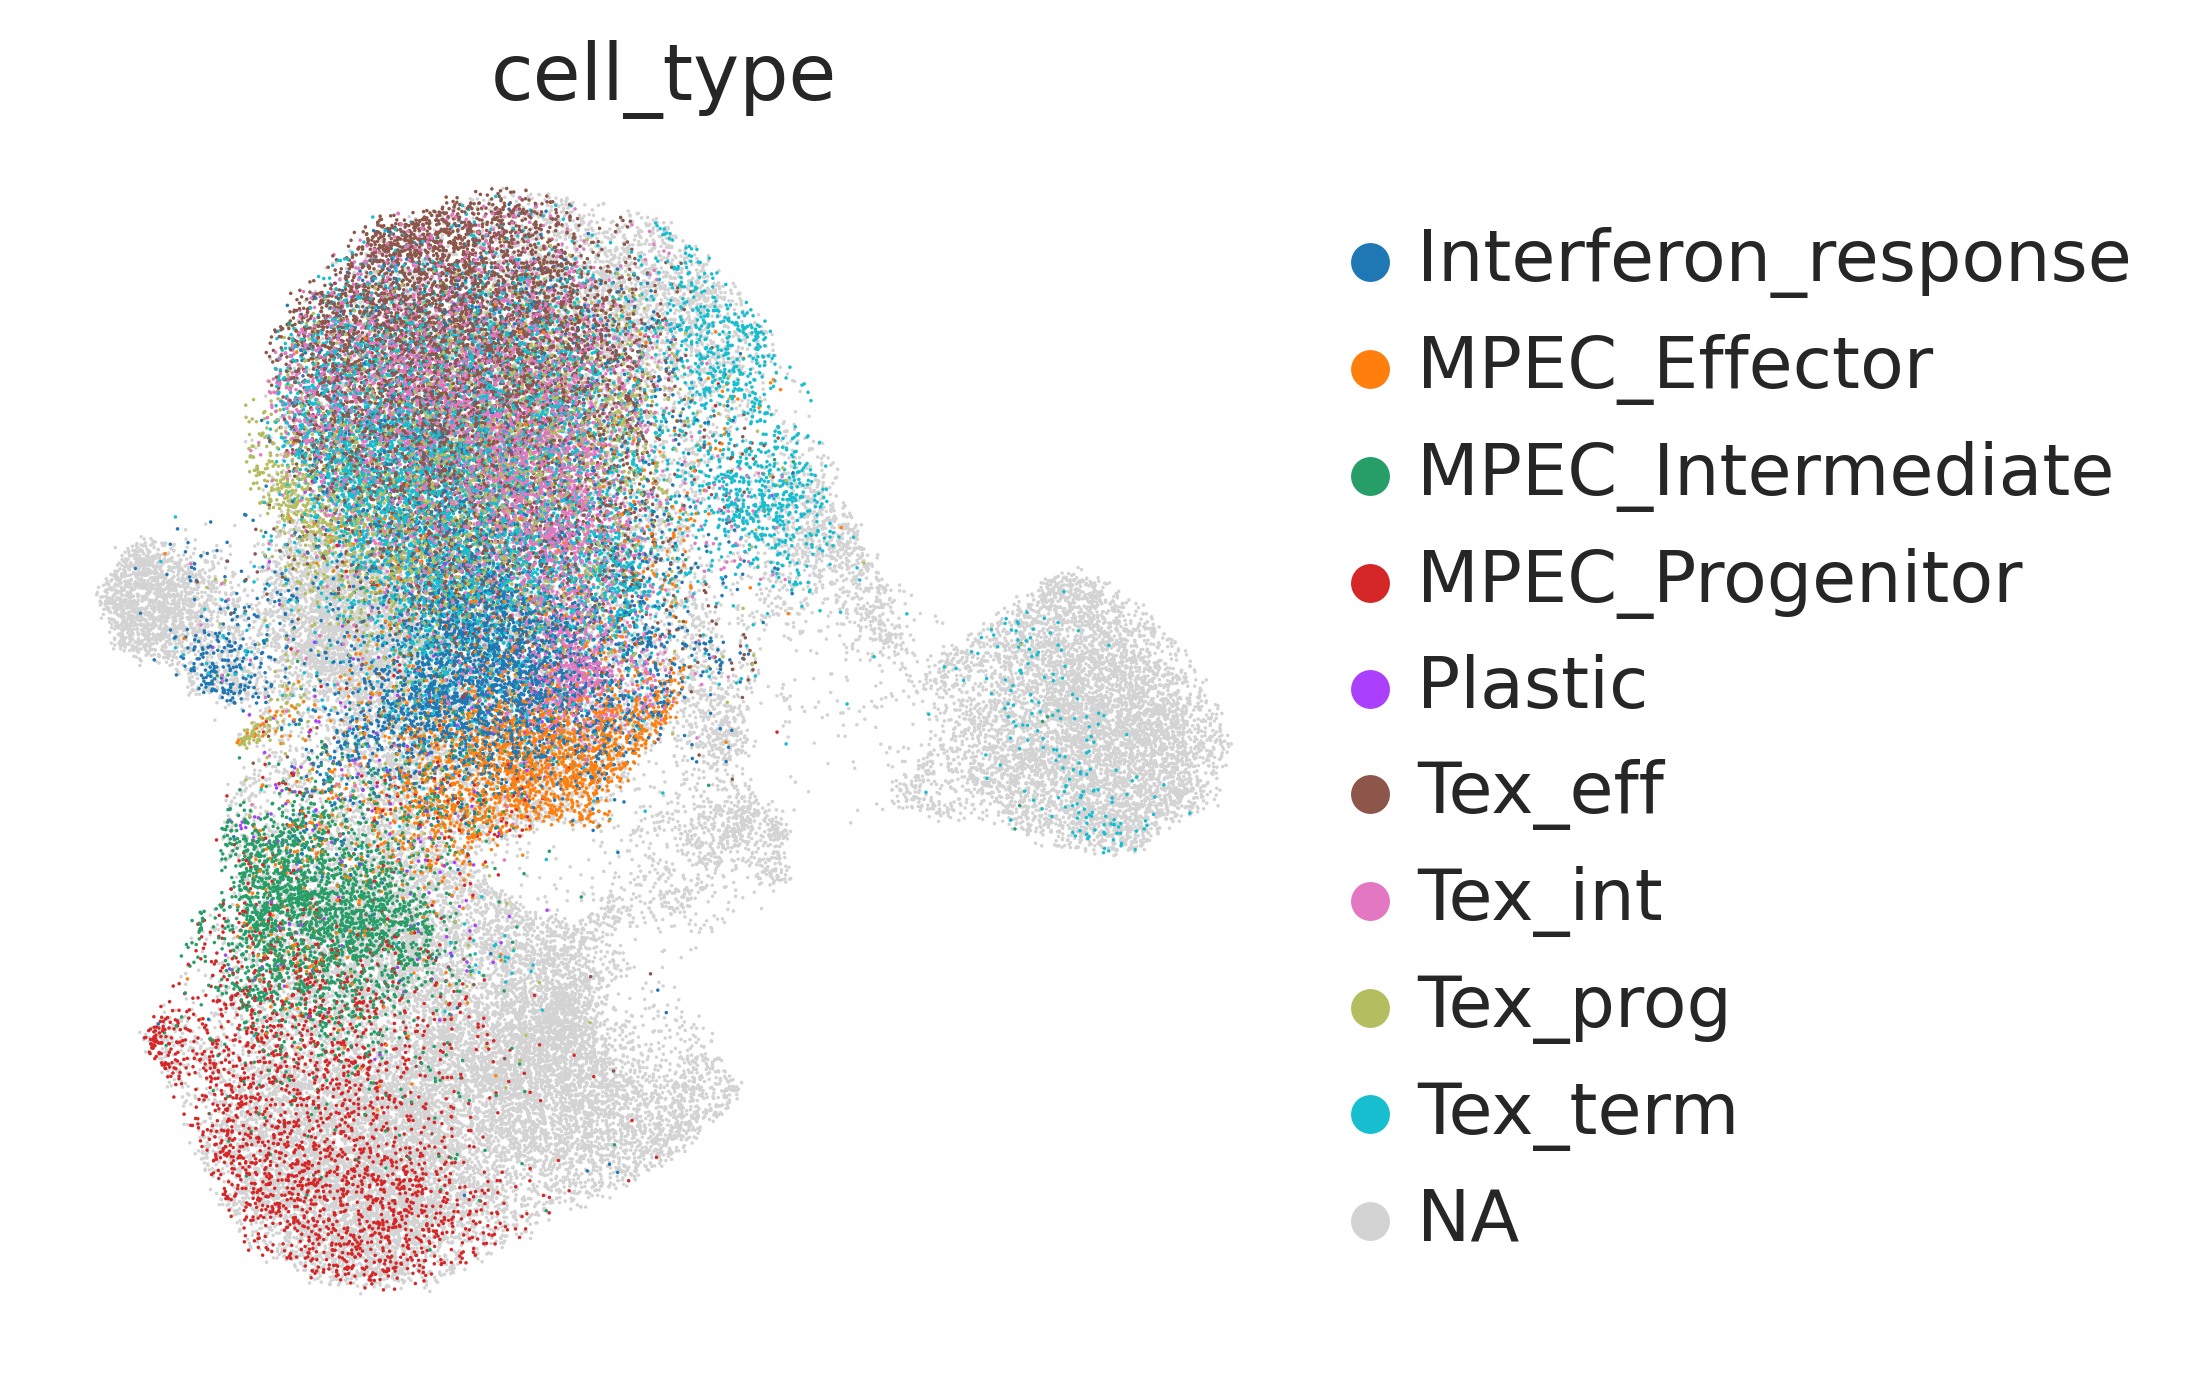

In [87]:
sc.pl.umap(adata_solo, color=["cell_type"], vmax="p99", cmap="Reds")

In [ ]:
def update_columns(row):
   
    if "ICI" not in row['sample_id']:
        row['origin'] = "colon"
    else:
         row['origin'] = "til"
        
    return row

# Apply the function to each row in the DataFrame
adata_solo.obs = adata_solo.obs.apply(update_columns, axis=1)

In [ ]:
def update_columns(row):
   
    if "ICI1"  in row['sample_id']:
        row['batch_id'] = "ICI1"
    elif "ICI2" in row['sample_id']:
         row['batch_id'] = "ICI2"
    elif row['sample_id'] == "10mix1":
        row['batch_id'] = "1"
    elif row['sample_id'] == "10mix2":
         row['batch_id'] = "2"
        
        
    return row

# Apply the function to each row in the DataFrame
adata_solo.obs = adata_solo.obs.apply(update_columns, axis=1)

In [ ]:
def update_columns(row):
   
    if row['sample_id'] == "10mix1":
        row['condition'] = "10mix"
    elif row['sample_id'] == "10mix2":
         row['condition'] = "10mix"
    elif row['sample_id'] == "11mix1":
         row['condition'] = "11mix"
    elif row['sample_id'] == "11mix2":
         row['condition'] = "11mix"
    elif row['sample_id'] == "GF1":
         row['condition'] = "GF"
    elif row['sample_id'] == "GF2":
         row['condition'] = "GF"
    elif row['sample_id'] == "GF-ICI2-plus":
         row['condition'] = "GF-plus"
    elif row['sample_id'] == "GF-ICI1-plus":
         row['condition'] = "GF-plus"
    elif row['sample_id'] == "GF-ICI2":
         row['condition'] = "GF"
    elif row['sample_id'] == "GF-ICI1":
         row['condition'] = "GF"
    elif row['sample_id'] == "10mix-ICI1":
         row['condition'] = "10mix"
    elif row['sample_id'] == "10mix-ICI2":
         row['condition'] = "10mix"
    elif row['sample_id'] == "11mix-ICI1":
         row['condition'] = "11mix"
    elif row['sample_id'] == "11mix-ICI2":
         row['condition'] = "11mix"
    
    
        
        
    return row

# Apply the function to each row in the DataFrame
adata_solo.obs = adata_solo.obs.apply(update_columns, axis=1)

In [ ]:
adata_solo

In [ ]:
sc.pl.umap(adata_solo, color=["leiden","origin"])

In [ ]:
adata_solo_til = adata_solo[adata_solo.obs["origin"] == "til"]

In [ ]:
sc.pp.neighbors(adata_solo_til, n_neighbors=15)

In [ ]:
sc.tl.leiden(adata_solo_til)

In [ ]:
sc.tl.louvain(adata_solo_til)

In [ ]:
#sc.tl.umap(adata_solo_til)

In [ ]:
adata_solo_til.obs

In [ ]:
adata_til1.obs

In [ ]:
adata.obs.index = [bc.replace(old_id, new_id) for bc in adata.obs.index.tolist()]

In [ ]:
adata_til2

In [ ]:
adata_solo_til.var["ribo"] = adata_solo.var_names.str.startswith(("Rps", "Rpl"))

In [ ]:
adata_solo_til = adata_solo_til[:, adata_solo_til.var['ribo'] == False].copy()

In [ ]:
sc.pp.neighbors(adata_solo_til, n_neighbors=10)
sc.tl.leiden(adata_solo_til, resolution=0.32, n_iterations=-1)
sc.tl.umap(adata_solo_til)

In [ ]:
sc.pl.umap(adata_solo_til, color=["leiden","louvain"])

In [ ]:
sc.pl.umap(adata_solo_til, color=["Sell","Cd44"], vmax="p99", cmap="Reds")

In [ ]:
sc.pl.umap(adata_solo_til, color=["Klrg1","Il7r","Tbx21"], vmax="p99", cmap="Reds")

In [ ]:
adata_solo_colon = adata_solo[adata_solo.obs["origin"] == "colon"]

In [ ]:
adata_solo_colon.var["ribo"] = adata_solo.var_names.str.startswith(("Rps", "Rpl"))

In [ ]:
adata_solo_colon = adata_solo_colon[:, adata_solo_colon.var['ribo'] == False].copy()

In [ ]:
sc.pp.neighbors(adata_solo_colon, n_neighbors=10)
sc.tl.leiden(adata_solo_colon, resolution=0.32, n_iterations=-1)
sc.tl.umap(adata_solo_colon)

In [ ]:
sc.pl.umap(adata_solo_colon, color=["leiden","sample_id"])

In [ ]:
sc.pl.umap(adata_solo_colon, color=["Sell","Cd44"], vmax="p99", cmap="Reds")